# Chapter 1 机器学习总览

## Setup

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
# define the default font sizes, to plot pretty figures

import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
import numpy as np

np.random.seed(42)

## 1. 何为机器学习？（What Is Machine Learning?）

机器学习是编程计算机的科学（和艺术），以便它们可以从数据中学习。

机器学习是一个研究领域，它赋予计算机在不被明确编程的情况下进行学习的能力。--Arthur Samuel, 1959

## 2. 为什么使用机器学习？（Why Use Machine Learning?）

通过挖掘大量的数据来发现隐藏的模式被称为数据挖掘，而机器学习则非常擅长于数据挖掘。

总结来说，机器学习擅长于：

1. 现有的解决方案需要大量的微调或一长串规则的问题（机器学习模型通常可以简化代码，并且比传统方法性能更好）。
2. 使用传统方法的复杂问题没有产生好的解决方案（最好的机器学习技术也许能找到解决方案）。
3. 波动的环境（机器学习系统可以很容易地对新数据进行重新训练，始终保持最新状态）。
4. 深入了解复杂的问题和大量的数据。

## 3. 机器学习系统的类型（Types of Machine Learning Systems）

机器学习系统有如此多的类型，根据以下标准将它们进行广泛的分类是有用的：

1. 它们在培训过程中如何被监督（有监督、无监督、半监督、自监督和其他监督）。
2. 它们是否可以动态地逐步学习（在线学习和批量学习）。
3. 它们是通过简单地将新数据点与已知数据点进行比较，还是通过检测训练数据中的模式并建立一个预测模型，就像科学家所做的那样（基于实例和基于模型的学习）。

### 3.1 训练监督（Training Supervision）

**监督学习**：在监督学习中，您输入给算法的训练集包括所需的解决方案，称为标签。

**无监督学习**：在无监督学习中，训练数据是未标记的，这个系统试图在没有老师的情况下学习。

**半监督学习**：在半监督学习中，由于标记数据通常是耗时和昂贵的，因此您通常会有大量未标记的实例，而很少有有标记的实例。

**自监督学习**：从一个完全未标记的数据集中生成一个完全标记的数据集。同样，一旦整个数据集被标记出来，任何有监督的学习算法都可以被使用。这种方法被称为自监督学习。

**强化学习**：强化学习下，学习系统被称为agent，它可以观察环境，选择并执行行动，并获得作为回报的奖励（或以负奖励的形式进行的惩罚）。然后，它必须学会什么是最好的策略，称为策略，随着时间的推移获得最大的回报。策略定义了agent在给定情况下应该选择什么操作。

### 3.2 批量学习与在线学习（Batch Versus Online Learning）

**批量学习**：在批处理学习中，系统无法渐进式学习：它必须使用所有可用的数据进行训练。这通常需要大量的时间和计算资源，所以它通常是离线完成的。首先对系统进行训练，然后投入生产，不再学习就开始运行；它只是应用它所学到的东西。这被称为离线学习。

**在线学习**：在在线学习中，通过按顺序向系统提供数据实例来逐步训练系统，可以单独或分成称为小批量的小组。每个学习步骤都是快速和廉价的，因此系统可以在新数据到达时动态地学习新数据。

### 3.3 基于实例的学习与基于模型的学习（Instance-Based Versus Model-Based Learning）

**基于实例的学习**：系统认真学习这些例子，然后通过使用相似性度量将它们与学习到的例子（或它们的一个子集）进行比较，从而推广到新的案例。

**基于模型的学习**：从一组示例中推广的另一种方法是为这些示例建立一个模型，然后使用该模型来进行预测。

## 4. 机器学习的主要挑战（Main Challenges of Machine Learning）

**机器学习的主要挑战**：

1. 训练数据的数据量不足
2. 非代表性训练数据
3. 质量差的数据
4. 不相关的特性
5. 过拟合训练数据
6. 训练数据拟合不足

## 5. 测试和验证（Testing and Validating）

了解一个模型如何推广到新案例的唯一方法是在新案例上实际尝试它。一种方法是将您的模型放在生产中，并监控它的性能。这工作得很好，但如果你的模型非常糟糕，你的用户就会抱怨——这不是最好的主意。

一个更好的选择是将数据分成两组：训练集和测试集。正如这些名称所暗示的，您使用训练集训练模型，并使用测试集测试它。新情况下的错误率称为泛化误差（或样本外误差），通过评估测试集上的模型，您可以得到这个误差的估计值。这个值告诉您模型在从未见过的实例上的表现如何。

如果训练误差很低（即，你的模型在训练集上犯的错误很少），但泛化误差很高，这意味着你的模型对训练数据存在过拟合。

通常使用80%的数据用于训练，而保留20%的数据用于测试。然而，这取决于数据集的大小：如果它包含1000万个实例，那么保留1%意味着您的测试集将包含100000个实例，可能足以得到对泛化误差的良好估计。

### 5.1 超参数调整和模型选择（Hyperparameter Tuning and Model Selection）

评估一个模型非常简单：只需使用一个测试集。但是假设你在两种类型的模型（比如说，一个线性模型和一个多项式模型）之间犹豫不决：你如何能在它们之间做出选择呢？一种选择是训练两者，并比较它们使用测试集的泛化效果。

现在假设线性模型推广得更好，但是你想要应用一些正则化来避免过拟合。问题是，你如何选择正则化超参数的值？一种选择是使用这个超参数的100个不同的值来训练100个不同的模型。假设您找到了产生泛化误差最低的模型的最佳超解析值——比如说，只有5%的误差。您将这个模型启动到生产中，但不幸的是，它的性能没有预期的那么好，并产生15%的错误。刚才发生了什么？

问题是，您在测试集上多次测量泛化误差，并调整了模型和超参数，以为该特定集生成最佳模型。这意味着该模型不太可能在新数据上表现得同样好。

这个问题的一个常见解决方案称为**保留验证（holdout validation）**：只需拿出训练集的一部分来评估几个候选模型并选择最好的一个。新的保留集称为验证集（或开发选择集，或开发集）。更具体地说，您在简化的训练集（即，完整的训练集减去验证集）上使用各种超参数训练多个模型，并选择在验证集上表现最好的模型。在此保留验证过程之后，您将在整个训练集（包括验证集）上训练最佳模型，这将得到最终的模型。最后，您将在测试集上评估这个最终的模型，以获得泛化误差的估计值。

这个解决方案通常效果很好。但是，如果验证集太小，那么模型评估将不精确：您可能会错误地选择一个次优模型。相反，如果验证集太大，那么剩余的训练集将比整个训练集小得多。为什么会如此糟糕？嗯，由于最终的模型将在完整的训练集上进行训练，所以比较在一个更小的训练集中训练的候选模型是不理想的。这就像选择最快的短跑运动员参加马拉松比赛一样。解决这个问题的一种方法是使用许多小验证集执行重复交叉验证。每个模型在对其余数据进行训练后，对每个验证集进行一次评估。通过平均出一个模型的所有评估，您可以得到一个更准确的性能度量。然而，它有一个缺点：训练时间要乘以验证集的数量。


### 5.2 数据失配（Data Mismatch）

在某些情况下，很容易获得大量的数据来进行培训，但这些数据可能不能完全代表将在生产中使用的数据。例如，假设你想创建一个移动应用程序来给花朵拍照，并自动确定它们的种类。你可以很容易地从网络上下载数百万张花的图片，但它们并不能完全代表那些将在移动设备上使用该应用程序实际拍摄的照片。也许你只有1000张有代表性的照片（即用应用程序拍摄的）。

在这种情况下，要记住的最重要规则是，验证集和测试集必须尽可能代表您希望在生产中使用的数据，因此它们应该完全由代表性图片组成，将一半放在验证集中，一半放在测试集中（确保没有重复或接近重复）。训练你的模型在网络图片后，如果你观察到模型的性能验证集令人失望，你不会知道这是因为你的模型过度适应训练集，还是这只是由于网络图片和移动应用程序之间图片的不匹配。

一种解决方案是将一些训练图片（从网络上）保存在另一套被Andrew Ng命名为**训练开发集（train-dev set）**。在模型被训练之后（在训练集上，而不是在训练开发集上），您可以在训练开发集上对其进行评估。如果模型表现不佳，那么它就是过拟合训练集，所以你应该尝试简化或规范模型，获得更多的训练数据，并清理训练数据。但是，如果它在训练开发集上表现得很好，那么您就可以在开发集上评估模型。如果它的性能不佳，那么问题一定来自于数据不匹配。你可以尝试通过对网络图像进行预处理，使它们看起来更像移动应用程序将拍摄的图片来解决这个问题，然后再训练模型。一旦您有了一个在训练开发集和开发集上都表现良好的模型，您就可以在测试集上最后一次评估它，以了解它在生产中的性能如何。

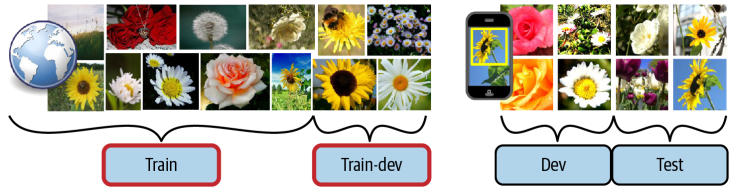